## Baselines Models - Logistic Regression

For the baseline models, I have worked with 2 models: 

1. Using the Features extracted from German BERT model , used a Majority Class by working with DummyClassifier from sklearn library

2. Using the Features Extracted from BERT Model, used a Logistic Regression Classifier from sklearn 

## 1.1. Baseline 2. Logistic Regression from Feature Extraction with BERT



In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
def load_split(split): 

  with open(f'{split}.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)
    print(X.shape, y.shape)
  return X, y

In [ ]:
!tar -zvxf dataset_nparray.tar.gz

dev.npy
test.npy
training.npy


In [ ]:
X_train, y_train = load_split("training")
X_dev, y_dev = load_split("dev")
X_test, y_test = load_split("test")

(6975, 768) (6975,)
(1532, 768) (1532,)
(1502, 768) (1502,)


In [ ]:
# Build the Classifier ( LogisticRegression )

logistic_classifier = LogisticRegression(max_iter=3000)
logistic_classifier.fit(X_train, y_train)
logistic_classifier.score(X_dev, y_dev)

0.9360313315926893

## 2. Evaluation 

We can observe how the score on the test set is around 42% accuracy. 

Now we will see how it will perform in other models

In [ ]:
# Evaluate on the test set
logistic_classifier.score(X_test, y_test)

0.940745672436751

In [ ]:
y_preds = logistic_classifier.predict(X_test)
y_preds[:5]

array([0, 2, 0, 1, 2])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def plot_matrix(y_preds, gold, labels): 
  c_matrix = confusion_matrix(y_true=gold, y_pred=y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(8,8))
  display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                                          display_labels=labels)
  display_matrix.plot(cmap="RdPu",values_format=".2f", ax=ax, colorbar=False)
  plt.title("Confusion Matrix for Baseline model")
  plt.show()

In [ ]:
classes = ["soft","tech","none"]

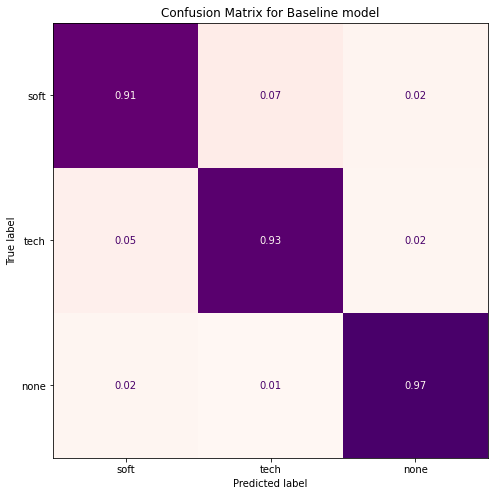

In [ ]:
plot_matrix(y_preds, y_test, classes)